<a href="https://colab.research.google.com/github/tusita3660/DLProjects/blob/main/ANN_Classification_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Classification

1. Import Library & Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip "/content/drive/MyDrive/DLML/ myECG.zip" -d "/content/drive/MyDrive/DLML/"

Archive:  /content/drive/MyDrive/DLML/ myECG.zip
replace /content/drive/MyDrive/DLML/ECG/mitbih_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/DLML/ECG/mitbih_train.csv", header = None)
test_data = pd.read_csv("/content/drive/MyDrive/DLML/ECG/mitbih_test.csv", header = None)

In [ ]:
train_data.head()

In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data Manipulation

In [ ]:
train_data[187] = train_data[187].astype('int')

In [ ]:
test_data[187] = test_data[187].astype('int')

In [ ]:
train_data[187].unique()

array([0, 1, 2, 3, 4])

An Electro Cardio Gram (ECG) is simple test that can be used to check your heart rhythm and electrical activity.

Classes = [N:0, S:1, V:2, F:3, Q:4] N: Non-ecotic beats (Normal Beats), - S: Supraventricular ectopic beats , V - Ventricular ectopic beats, F - Fusion Beats , Q - Unknown Beats.

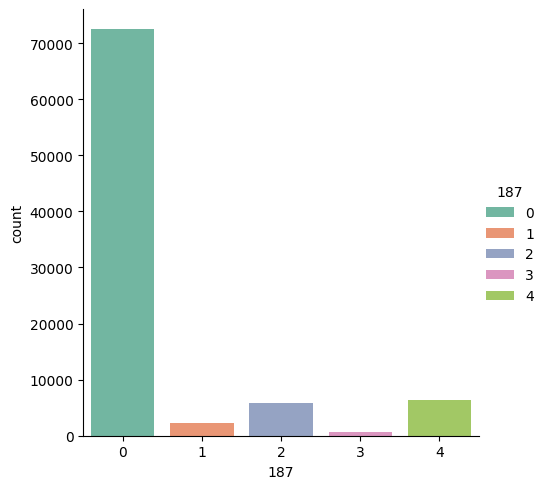

In [ ]:
sns.catplot(x = 187, kind = 'count', data = train_data, hue = 187, palette = 'Set2')

In [ ]:
train_data[187].value_counts()

,count
187,
0,72471
4,6431
2,5788
1,2223
3,641


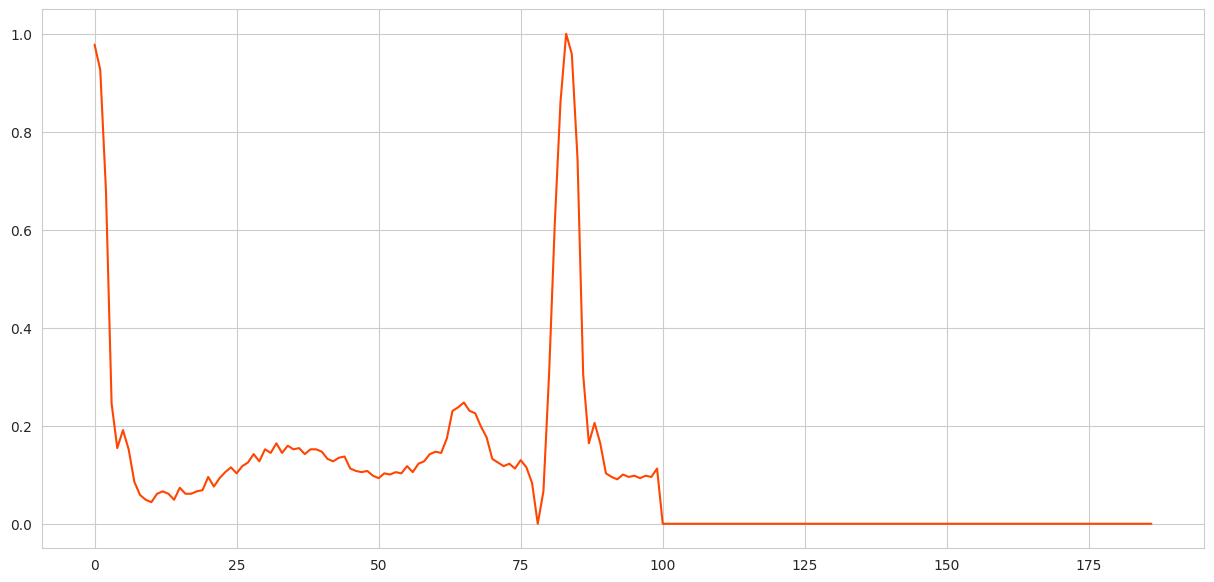

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
plt.plot(train_data.iloc[0, 0:187], color = 'orangered')
plt.show()

Filter DataFrames into Seperate Classes

In [ ]:
# Filter Data into seperate classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

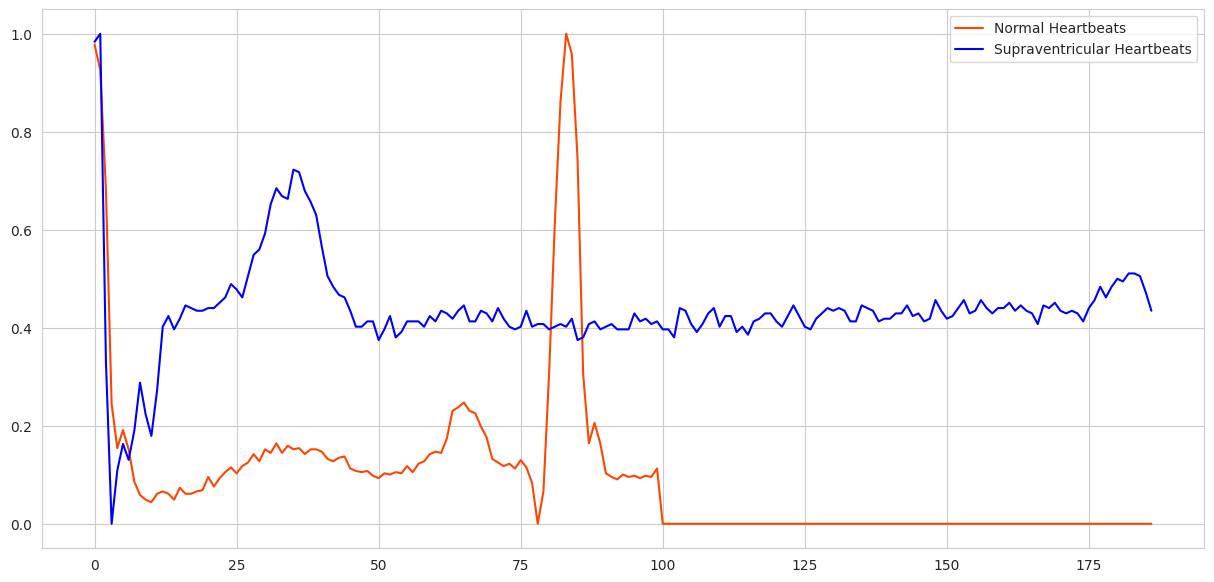

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
plt.plot(train_data.iloc[0, 0:187], color = 'orangered', label = 'Normal Heartbeats')
plt.plot(df_1.iloc[1, 0:187], color = 'blue', label = 'Supraventricular Heartbeats')
plt.legend()
plt.show()

Data Augmentation - SMOTE

In [ ]:
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 123)

In [ ]:
train_df = pd.concat([df_0, df_1, df_2, df_3, df_4])
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14967,1.0,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
71482,1.0,0.946619,0.651246,0.330961,0.000000,0.067616,0.092527,0.163701,0.192171,0.177936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23543,1.0,0.855967,0.302469,0.041152,0.185185,0.160494,0.098765,0.092593,0.109053,0.088477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9174,1.0,0.838806,0.738806,0.641791,0.604478,0.583582,0.580597,0.580597,0.591045,0.577612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42319,1.0,0.720257,0.019293,0.106109,0.073955,0.086817,0.070740,0.077170,0.070740,0.083601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
train_df[187].value_counts()

,count
187,
0,20000
4,6431
2,5788
1,2223
3,641


In [ ]:
features = train_df.drop(187, axis = 1)
labels = train_df[187]

Prepare Data for Imbalanced Classification

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE() # SMOTE() - This method can re-generate new samples using knn model
transformed_features, transformed_labels = oversample.fit_resample(features, labels)

In [ ]:
transformed_labels.value_counts()

,count
187,
0,20000
1,20000
2,20000
3,20000
4,20000


In [ ]:
transformed_labels.unique()

array([0, 1, 2, 3, 4])

In [ ]:
# multi-class classification
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(transformed_labels)
# labels into multiclass labels using to_categorical
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [ ]:
def build_model2():
  model = Sequential()
  # units = num of neurons, input_shape = number of features
  model.add(Dense(units = 64, activation = 'relu', input_shape = [187]))
  # Hidden Layers - I
  model.add(Dense(units = 128, activation = 'relu'))
  # Hidden Layers - I
  model.add(Dense(units = 128, activation = 'relu'))
  # Output layer
  model.add(Dense(units = 5, activation = 'softmax'))
  #Optimizers
  optimizers = Adam(learning_rate = 0.001)
  # error/loss function
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
  return model

In [ ]:
model = build_model2()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          12,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,509 (146.52 KB)

 Trainable params: 37,509 (146.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train = transformed_features.iloc[:, :].values
x_test = test_data.iloc[:, :-1].values

In [ ]:
y_test = to_categorical(test_data[187])

In [ ]:
history = model.fit(transformed_features, y_train, epochs = 50, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7919 - loss: 0.5782 - val_accuracy: 0.8963 - val_loss: 0.2781
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9206 - loss: 0.2172 - val_accuracy: 0.8758 - val_loss: 0.3228
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9446 - loss: 0.1590 - val_accuracy: 0.9253 - val_loss: 0.2220
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9563 - loss: 0.1247 - val_accuracy: 0.9226 - val_loss: 0.2295
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9641 - loss: 0.1023 - val_accuracy: 0.9322 - val_loss: 0.2011
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9691 - loss: 0.0903 - val_accuracy: 0.9403 - val_loss: 0.1843
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9740 - loss: 0.0773 - val_accuracy: 0.9306 - val_loss: 0.2313
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9751 - loss: 0.0724 - 

<Axes: >

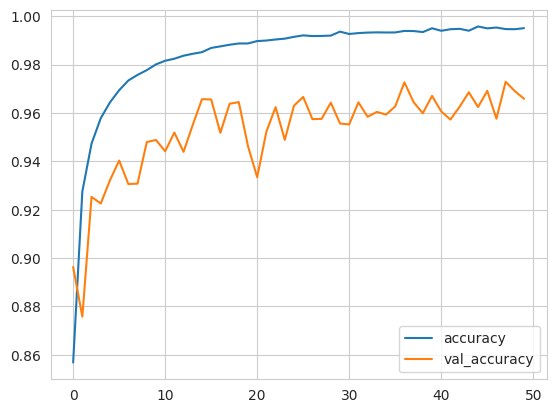

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()


In [ ]:
model.evaluate(x_test, y_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9731 - loss: 0.1368


[0.23705080151557922, 0.9658779501914978]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
prediction= model.predict(x_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
prediction

array([[9.99999940e-01, 1.69566815e-21, 3.75386472e-27, 8.91901759e-24,
        2.28244770e-23],
       [9.99986470e-01, 1.33802305e-05, 8.77848478e-08, 2.91538508e-14,
        3.62985302e-11],
       [9.99999940e-01, 1.85909919e-08, 6.41383811e-18, 6.65584199e-10,
        1.16424231e-12],
       ...,
       [9.91881208e-08, 3.59932570e-11, 4.35240427e-10, 1.79677711e-15,
        9.99999881e-01],
       [1.77383567e-20, 3.95249148e-18, 6.40460630e-30, 0.00000000e+00,
        1.00000000e+00],
       [3.18423642e-19, 3.10931260e-33, 1.49958014e-31, 0.00000000e+00,
        1.00000000e+00]], dtype=float32)

In [ ]:
yhat = np.argmax(prediction, axis =1)
yhat

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
#matrix b/w True n False Predition
confusion_matrix(test_data[187], yhat)

array([[17627,   252,   149,    71,    19],
       [   92,   451,     8,     3,     2],
       [   47,    15,  1358,    25,     3],
       [   16,     1,    11,   134,     0],
       [   20,     7,     6,     0,  1575]])

<Axes: >

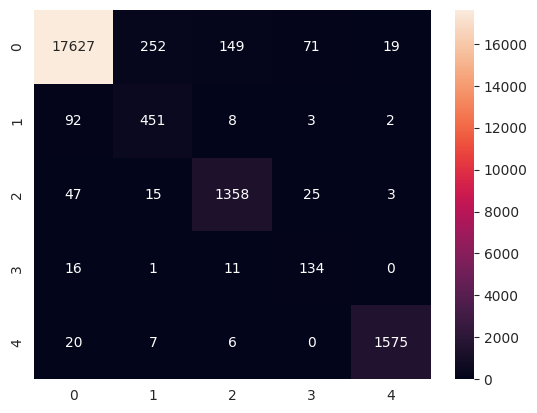

In [ ]:
sns.heatmap(confusion_matrix(test_data[187], yhat), annot = True, fmt = '0.0f')

In [ ]:
print(classification_report(test_data[187], yhat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.62      0.81      0.70       556
           2       0.89      0.94      0.91      1448
           3       0.58      0.83      0.68       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.81      0.91      0.85     21892
weighted avg       0.97      0.97      0.97     21892

